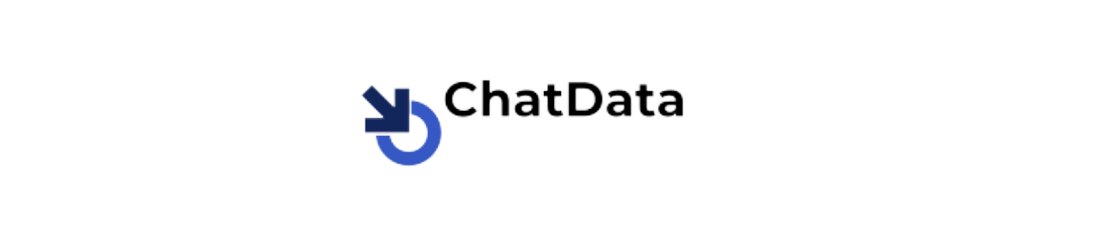

# ChatData

## Sqlite
We are using a file system called **sqlite**. It looks and acts like a real single user relational database (RDB). sqlite3 comes packaged with python. You do not need to install the library. You simply import it (as below).

- We are using Pandas to write and read to sqlite. Pandas will manage a lot of the complexity of dealing with a RDB. There are other ways of reading and writing to a RDB that are VERY common and often used in production systems.  

- The most common other way is to read or write to the RDB row by row. As you can see Pandas puts the entire dataframe into the RDB or extracts a new dataframe from the RDB. These are not row by row operations. These are set operations. Set operations ARE more efficient. However, it is common to use row by row operations to avoid needing large memory computers to hold the dataframes. One row only takes a few bytes. An entire dataframe could be many gigabytes and even petabytes of data. Obviously you will end up with problems with your compute resource if your files are this big. This will not happen to you in this activity and may never happen to you while you are a data analyst. Please just be aware of this. 

- This activity is primarily about querying a RDB, so, we are using a simple way that Pandas provides. If you want to learn the more complex way, just google 'reading and wrting to a relational database using python'. There are many resources to learn from.

- The data types that sqlite supports are quite limited. for example, it does not have a DATE type.  This is not a challenge for this project. However, more sophisticated database systems,such as Postgresql, have a large array of data types, such as "DATE", etc. that give those systems additional capability. 

- All of the SQL queries could also be performed on the Pandas DataFrames directly.  You may want to try this yourself for comparison (but make sure you do the SQL queries first, as this is an exercise in using SQL!).


## SQL Magic
Within the Jupyter notebook we will be using something called **SQL Magic**.  This provides a convenient way to write SQL queries directly into code cells in the notebook and to read the results back into a Pandas DataFrame.  This makes working with SQL much easier!

Note that you may need to update your sqlite version using `conda update -c anaconda sqlite` in order for the SQL Magic to work correctly.

## The Data Analysis Lifecycle
The sections in this notebook follow the stages of the Data Analysis Lifecycle introduced in an earlier activity.  The stages are:

- Acquire
- Transform
- Organise
- Analyse
- Communicate
- Maintain


The requirements document for this project is Template SQL queries.xlsx.

# Preliminary Steps: Create a Database
First let's import Sqlite and the other libraries we will need.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import sqlite3

In [2]:
#!pip install ipython-sql

### Create the Database
Now we will create the Sqlite database.  Here is some code that does this for you.  We use the `%load_ext` magic command to load the SQL Magic extension and then use `%sql` to connect to the database.

In [3]:
# If the db does not exist, sqlite will create it.
con = sqlite3.connect('chatdata.db')

# loads sql magic
%load_ext sql 

# connects sql magic command to the correct db
%sql sqlite:///chatdata.db 

#### Drop the `queries` table if it already exists
The queries table will be our record of the queries created to answer the questions from the requirements spreadsheet.  As we will be running this Jupyter notebook a few times, let's drop (i.e. remove) the queries table so that we start fresh each time.  Here is the code to do this.  We use the `%%sql` magic command to tell Jupyter that we are going to write SQL in the cell.


In [4]:
%%sql
DROP TABLE IF EXISTS 'queries'

 * sqlite:///chatdata.db
Done.


[]

# Task 1: Load the Data
Now we can start loading the data.  The tables will be created as we load the data.  

Note that some of these files are quite large, so make sure you have plenty of free memory!

## Lifecycle Stages: Transform and Organise
The data has already been processed into 3 clean data files ready for this project:

- users.csv not queries.csv
- posts.csv
- comments.csv

We will load these files into our database.

## Lifecycle Stage: Acquire
The data can be found in the OpenClassrooms instructions for this activity.

### Load Comments Data into a `comments` table
Now we will load the data from the csv files into our sqlite database.

First we load the csv file into a Pandas dataframe:

In [5]:
# Read the comments dataset into a DataFrame
comments = pd.read_csv('comments.csv')

# Explore the first 5 rows
comments.head()

,Id,PostId,Score,Text,CreationDate,UserId
0,723598,385373,0,Why the double normalization and could you ple...,2019-01-2019 19:34,0
1,723600,385373,0,As of the double normalization I meant Line 1 ...,2019-01-2019 19:56,0
2,726696,386665,0,"Thank you, interesting points towards directio...",2019-01-2019 03:55,0
3,725300,386234,0,"@André.B If you mean the outcome measure, then...",2019-01-2019 02:33,0
4,725308,386237,0,I think I kind of understand what a confidence...,2019-01-2019 02:59,0


Now take the comments dataframe and push the data into the Sqlite database table called 'comments':

In [6]:
# load comments into sqlite
comments.to_sql('comments', con, if_exists='replace', index=False)

# read back in to prove that it worked
sql = 'SELECT * FROM comments'
comments = pd.read_sql(sql, con)
comments.head()

,Id,PostId,Score,Text,CreationDate,UserId
0,723598,385373,0,Why the double normalization and could you ple...,2019-01-2019 19:34,0
1,723600,385373,0,As of the double normalization I meant Line 1 ...,2019-01-2019 19:56,0
2,726696,386665,0,"Thank you, interesting points towards directio...",2019-01-2019 03:55,0
3,725300,386234,0,"@André.B If you mean the outcome measure, then...",2019-01-2019 02:33,0
4,725308,386237,0,I think I kind of understand what a confidence...,2019-01-2019 02:59,0


### Load Other CSVs
Now that you have seen the code for loading in the comments.csv now do the same to read and write the posts.csv and users.csv to sqlite. 

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter code in the following cells. Insert as many cells as you want to do this.
    </font></div>

In [7]:
# Read the post dataset into a DataFrame
posts = pd.read_csv('posts.csv')

# Explore the first 5 rows
posts.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,423497,1,423511,0,2019-08-24 09:39,2,68,"<p>From wikipedia <a href=""https://en.wikipedi...",64552,NaN,...,NaN,NaN,24/08/2019 11:38,When are biased estimators with lower MSE pref...,<bias><unbiased-estimator><mse>,1,0,1,25/08/2019 10:25,NaN
1,423498,1,0,0,2019-08-24 09:47,1,24,<p>I am currently doing local sensitivity anal...,87231,NaN,...,NaN,06/09/2019 12:52,06/09/2019 12:52,How to interpret the result from local sensiti...,<sensitivity-analysis><elasticity>,1,0,0,NaN,NaN
2,423499,1,0,0,2019-08-24 09:48,1,56,<p>I'm an honours student in psychology doing ...,257207,NaN,...,NaN,NaN,25/08/2019 08:54,Power Analysis in G-Power - Mixed Model Anova,<anova><gpower>,2,0,0,NaN,NaN
3,423500,2,0,215865,2019-08-24 09:57,0,0,"<p>Maybe you can look this <a href=""https://me...",106606,NaN,...,NaN,NaN,24/08/2019 09:57,NaN,NaN,0,0,0,NaN,NaN
4,423502,2,0,423286,2019-08-24 10:44,3,0,<blockquote>\n <p>Q1) Is my approach valid?</...,220643,NaN,...,NaN,24/08/2019 12:13,24/08/2019 12:13,NaN,NaN,0,1,0,NaN,NaN


In [8]:
# load post DataFrame into sqlite
posts.to_sql('posts', con, if_exists='replace', index=False)

# read back in to prove that it worked
sql = 'SELECT * FROM posts'
posts = pd.read_sql(sql, con)
posts.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,423497,1,423511,0,2019-08-24 09:39,2,68,"<p>From wikipedia <a href=""https://en.wikipedi...",64552,None,...,None,None,24/08/2019 11:38,When are biased estimators with lower MSE pref...,<bias><unbiased-estimator><mse>,1,0,1,25/08/2019 10:25,None
1,423498,1,0,0,2019-08-24 09:47,1,24,<p>I am currently doing local sensitivity anal...,87231,None,...,None,06/09/2019 12:52,06/09/2019 12:52,How to interpret the result from local sensiti...,<sensitivity-analysis><elasticity>,1,0,0,None,None
2,423499,1,0,0,2019-08-24 09:48,1,56,<p>I'm an honours student in psychology doing ...,257207,None,...,None,None,25/08/2019 08:54,Power Analysis in G-Power - Mixed Model Anova,<anova><gpower>,2,0,0,None,None
3,423500,2,0,215865,2019-08-24 09:57,0,0,"<p>Maybe you can look this <a href=""https://me...",106606,None,...,None,None,24/08/2019 09:57,None,None,0,0,0,None,None
4,423502,2,0,423286,2019-08-24 10:44,3,0,<blockquote>\n <p>Q1) Is my approach valid?</...,220643,None,...,None,24/08/2019 12:13,24/08/2019 12:13,None,None,0,1,0,None,None


In [9]:
# Read the users dataset into a DataFrame
users = pd.read_csv('users.csv',parse_dates=True)

# Explore the first 5 rows
users.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,AccountId
0,157607,31,2017-04-17 14:50,user157607,23/07/2019 16:44,NaN,NaN,NaN,0,0,0,https://www.gravatar.com/avatar/2efb161849efa4...,10705183
1,157656,101,2017-04-17 20:08,user102859,26/06/2019 13:42,NaN,NaN,NaN,3,0,0,https://i.stack.imgur.com/eY4ka.jpg?s=128&g=1,10567606
2,157704,133,2017-04-18 05:10,jupiar,25/11/2019 13:32,NaN,"Shanghai, China","<p>Originally from the U.K, I have an Undergra...",1,1,0,https://www.gravatar.com/avatar/720e20205122c5...,9501631
3,157709,155,2017-04-18 06:39,farmer,17/02/2019 19:44,NaN,NaN,NaN,16,0,0,https://www.gravatar.com/avatar/0f8c4bde3d8f25...,10709837
4,157755,101,2017-04-18 12:56,Miki P,12/08/2019 17:02,NaN,NaN,NaN,1,9,0,https://www.gravatar.com/avatar/af088558cd81c5...,7969290


In [10]:
# load post DataFrame into sqlite
users.to_sql('users', con, if_exists='replace', index=False)

# read back in to prove that it worked
sql = 'SELECT * FROM users'
users = pd.read_sql(sql, con)
users.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,AccountId
0,157607,31,2017-04-17 14:50,user157607,23/07/2019 16:44,None,None,None,0,0,0,https://www.gravatar.com/avatar/2efb161849efa4...,10705183
1,157656,101,2017-04-17 20:08,user102859,26/06/2019 13:42,None,None,None,3,0,0,https://i.stack.imgur.com/eY4ka.jpg?s=128&g=1,10567606
2,157704,133,2017-04-18 05:10,jupiar,25/11/2019 13:32,None,"Shanghai, China","<p>Originally from the U.K, I have an Undergra...",1,1,0,https://www.gravatar.com/avatar/720e20205122c5...,9501631
3,157709,155,2017-04-18 06:39,farmer,17/02/2019 19:44,None,None,None,16,0,0,https://www.gravatar.com/avatar/0f8c4bde3d8f25...,10709837
4,157755,101,2017-04-18 12:56,Miki P,12/08/2019 17:02,None,None,None,1,9,0,https://www.gravatar.com/avatar/af088558cd81c5...,7969290


### **TODO**: Drop Duplicates
Look for and drop any duplicates in all 3 of the tables (if they exist). Use Pandas to do this. If you find duplicates, you will need to rewrite the table.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter code in the following cells. 
    </font></div>

In [11]:
# Find duplicates in the comments DataFrame
comments[comments.duplicated()]

,Id,PostId,Score,Text,CreationDate,UserId


In [12]:
# Find duplicates in the posts DataFrame
posts[posts.duplicated()]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate


In [13]:
# Find duplicates in the posts DataFrame
users[users.duplicated()]

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,AccountId


>There are no duplicates in the 3 datasets

## Review the Data

Spend some time reviewing the data.  Understand what data we have, think about how that data can be used to assist in the initiative of understanding how ChatData is used in the real world.  Is the data organised in a way that would lend itself to being manged in a relational database?  How would the different tables be connected?  What are the primary and foreign keys?  Would this give you a 3NF model?

Also think about security and ethics.  Is there personal data in here?  Could individuals be identified through this data?  It it ethical to use the data in this way?  You will be asked to comment on these questions later!

Use the code below to help you.

In [14]:
users.columns

Index(['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate',
       'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes',
       'ProfileImageUrl', 'AccountId'],
      dtype='object')

In [15]:
users.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,AccountId
0,157607,31,2017-04-17 14:50,user157607,23/07/2019 16:44,None,None,None,0,0,0,https://www.gravatar.com/avatar/2efb161849efa4...,10705183
1,157656,101,2017-04-17 20:08,user102859,26/06/2019 13:42,None,None,None,3,0,0,https://i.stack.imgur.com/eY4ka.jpg?s=128&g=1,10567606
2,157704,133,2017-04-18 05:10,jupiar,25/11/2019 13:32,None,"Shanghai, China","<p>Originally from the U.K, I have an Undergra...",1,1,0,https://www.gravatar.com/avatar/720e20205122c5...,9501631
3,157709,155,2017-04-18 06:39,farmer,17/02/2019 19:44,None,None,None,16,0,0,https://www.gravatar.com/avatar/0f8c4bde3d8f25...,10709837
4,157755,101,2017-04-18 12:56,Miki P,12/08/2019 17:02,None,None,None,1,9,0,https://www.gravatar.com/avatar/af088558cd81c5...,7969290


In [16]:
comments.columns

Index(['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId'], dtype='object')

In [17]:
comments.head()

,Id,PostId,Score,Text,CreationDate,UserId
0,723598,385373,0,Why the double normalization and could you ple...,2019-01-2019 19:34,0
1,723600,385373,0,As of the double normalization I meant Line 1 ...,2019-01-2019 19:56,0
2,726696,386665,0,"Thank you, interesting points towards directio...",2019-01-2019 03:55,0
3,725300,386234,0,"@André.B If you mean the outcome measure, then...",2019-01-2019 02:33,0
4,725308,386237,0,I think I kind of understand what a confidence...,2019-01-2019 02:59,0


In [18]:
posts.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'Score', 'ViewCount', 'Body', 'OwnerUserId', 'OwnerDisplayName',
       'LastEditorUserId', 'LastEditorDisplayName', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate'],
      dtype='object')

In [19]:
posts.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,423497,1,423511,0,2019-08-24 09:39,2,68,"<p>From wikipedia <a href=""https://en.wikipedi...",64552,None,...,None,None,24/08/2019 11:38,When are biased estimators with lower MSE pref...,<bias><unbiased-estimator><mse>,1,0,1,25/08/2019 10:25,None
1,423498,1,0,0,2019-08-24 09:47,1,24,<p>I am currently doing local sensitivity anal...,87231,None,...,None,06/09/2019 12:52,06/09/2019 12:52,How to interpret the result from local sensiti...,<sensitivity-analysis><elasticity>,1,0,0,None,None
2,423499,1,0,0,2019-08-24 09:48,1,56,<p>I'm an honours student in psychology doing ...,257207,None,...,None,None,25/08/2019 08:54,Power Analysis in G-Power - Mixed Model Anova,<anova><gpower>,2,0,0,None,None
3,423500,2,0,215865,2019-08-24 09:57,0,0,"<p>Maybe you can look this <a href=""https://me...",106606,None,...,None,None,24/08/2019 09:57,None,None,0,0,0,None,None
4,423502,2,0,423286,2019-08-24 10:44,3,0,<blockquote>\n <p>Q1) Is my approach valid?</...,220643,None,...,None,24/08/2019 12:13,24/08/2019 12:13,None,None,0,1,0,None,None


# Working with Sqlite and SQL Magic
In this section let's spend a little time understanding a bit more about how we can work with Sqlite within Jupyter.

Let's look at 2 ways to query the sqlite database: using SQL Magic or using Pandas.  Either way is fine for this project.

## Writing queries with SQL Magic

You will now need to write some queries to get answers to the questions in the requirements.  

For single-line queries, start the cell with `%sql` and simply enter your query:

In [20]:
# This is an example
%sql SELECT COUNT(*) FROM comments

 * sqlite:///chatdata.db
Done.


COUNT(*)
50000


For multi line sql statements use `%%sql` as follows. This tells Jupyter that *everything* in this cell should be interpreted as sql. So, NO comments other statements are allowed:

In [21]:
%%sql
SELECT Id, PostId, Score, Text
    FROM comments
        LIMIT 5

 * sqlite:///chatdata.db
Done.


Id,PostId,Score,Text
723598,385373,0,Why the double normalization and could you please explain why rebalancing works even if the operation is non linear?
723600,385373,0,"As of the double normalization I meant Line 1 and 2 of the function, inside `f_score` there's already a `w/sum(w)`. In my head doing a correlation function turns what would be linear into non-linear because of the variance and covariances. In my `optim` example I'm using a negative fnscale so that it maximizes instead of minizing. Thanks for your input!"
726696,386665,0,"Thank you, interesting points towards directions I can explore ! Have not been ""there"" yet."
725300,386234,0,"@André.B If you mean the outcome measure, then it's the Piper Fatigue Scale."
725308,386237,0,"I think I kind of understand what a confidence interval means (looked up a beginner's guide to it) but I'm just confused by the results in this paper as I've been given two statistics (95% CI, −1.30, −0.48). They're negative, I'm not sure if that affects anything. Apologies if I sound ridiculous, but I've never studied stats, only covered some very basics as my course isn't to do with maths/statistics etc"


## Writing queries with Pandas
Another way to write queries is to use pandas:

In [22]:
sql = """
SELECT Id, PostId, Score, Text
    FROM comments
        LIMIT 5
        """
result = pd.read_sql(sql, con)
result

,Id,PostId,Score,Text
0,723598,385373,0,Why the double normalization and could you ple...
1,723600,385373,0,As of the double normalization I meant Line 1 ...
2,726696,386665,0,"Thank you, interesting points towards directio..."
3,725300,386234,0,"@André.B If you mean the outcome measure, then..."
4,725308,386237,0,I think I kind of understand what a confidence...


# Creating Tables with Referential Integrity

When we loaded the csv files into Sqlite database tables, Sqlite created the tables for us behind the scenes. Let's inspect this a bit more.

We can see how Sqlite created the tables by querying the `sqlite_master` table, which Sqlite uses to keep track of what objects have been created in the database:

In [23]:
%%sql
select sql from sqlite_master

 * sqlite:///chatdata.db
Done.


sql
"CREATE TABLE ""comments"" (""Id"" INTEGER, ""PostId"" INTEGER, ""Score"" INTEGER, ""Text"" TEXT, ""CreationDate"" TEXT, ""UserId"" INTEGER)"
"CREATE TABLE ""posts"" (""Id"" INTEGER, ""PostTypeId"" INTEGER, ""AcceptedAnswerId"" INTEGER, ""ParentId"" INTEGER, ""CreationDate"" TEXT, ""Score"" INTEGER, ""ViewCount"" INTEGER, ""Body"" TEXT, ""OwnerUserId"" INTEGER, ""OwnerDisplayName"" TEXT, ""LastEditorUserId"" INTEGER, ""LastEditorDisplayName"" TEXT, ""LastEditDate"" TEXT, ""LastActivityDate"" TEXT, ""Title"" TEXT, ""Tags"" TEXT, ""AnswerCount"" INTEGER, ""CommentCount"" INTEGER, ""FavoriteCount"" INTEGER, ""ClosedDate"" TEXT, ""CommunityOwnedDate"" TEXT)"
"CREATE TABLE ""users"" (""Id"" INTEGER, ""Reputation"" INTEGER, ""CreationDate"" TEXT, ""DisplayName"" TEXT, ""LastAccessDate"" TEXT, ""WebsiteUrl"" TEXT, ""Location"" TEXT, ""AboutMe"" TEXT, ""Views"" INTEGER, ""UpVotes"" INTEGER, ""DownVotes"" INTEGER, ""ProfileImageUrl"" TEXT, ""AccountId"" INTEGER)"


The above results show the `CREATE TABLE` statements that could be used by Sqlite to recreate the tables with the exact same structure.

The problem with the CREATE TABLE statements above is that they don't enforce **referential integrity**.  In other words, they don't ensure that every UserId and PostId in the comments table refers to an actual UserId and PostId in the users and posts tables.  At the moment. we can insert any old number here, and even have multiple users with the same Id!  One of the advantages of working with relational databases is that they can enforce the correct uniqueness and relationships in the data, but at the moment we are not using that feature.  So let's fix that...

First, let's drop the original tables:


In [24]:
%%sql
DROP TABLE comments;
DROP TABLE users;
DROP TABLE posts;

 * sqlite:///chatdata.db
Done.
Done.
Done.


[]

Prove that this worked by selecting the names of the tables back.  We should have no tables:

In [25]:
%%sql
SELECT name FROM sqlite_master WHERE type='table'
    ORDER BY name

 * sqlite:///chatdata.db
Done.


name


In Sqlite we need to enable the enforcement of foreign key constraints:

In [26]:
%%sql
PRAGMA foreign_keys=ON;

 * sqlite:///chatdata.db
Done.


[]

Now recreate the users table with a **primary key constraint** by copying the CREATE TABLE statement from above and adding the NOT NULL PRIMARY KEY clause to the Id:

In [27]:
%%sql
CREATE TABLE "users" (
"Id" INTEGER NOT NULL PRIMARY KEY,
"Reputation" INTEGER,
"CreationDate" TEXT,
"DisplayName" TEXT,
"LastAccessDate" TEXT,
"WebsiteUrl" TEXT,
"Location" TEXT,
"AboutMe" TEXT,
"Views" INTEGER,
"UpVotes" INTEGER,
"DownVotes" INTEGER,
"ProfileImageUrl" TEXT,
"AccountId" INTEGER
);


 * sqlite:///chatdata.db
Done.


[]

Now do the same for the posts table:

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

In [28]:
# Run the CREATE TABLE statement for the posts table, including the primary key constraint


In [29]:
#%%sql
#DROP TABLE posts

In [30]:
%%sql
CREATE TABLE "posts" (
"Id" INTEGER NOT NULL PRIMARY KEY,
"PostTypeId" INTEGER,
"AcceptedAnswerId" INTEGER,
"ParentId" INTEGER,
"CreationDate" TEXT,
"Score" INTEGER,
"ViewCount" INTEGER,
"Body" TEXT,
"OwnerUserId" INTEGER,
"OwnerDisplayName" TEXT,
"LastEditorUserId" INTEGER,
"LastEditorDisplayName" TEXT,
"LastEditDate" TEXT,
"LastActivityDate" TEXT,
"Title" TEXT,
"Tags" TEXT,
"AnswerCount" INTEGER,
"CommentCount" INTEGER,
"FavoriteCount" INTEGER,
"ClosedDate" TEXT,
"CommunityOwnedDate" TEXT,
FOREIGN KEY(OwnerUserId) REFERENCES users(Id)
);


 * sqlite:///chatdata.db
Done.


[]

Now for the comments table.  We need to add the primary key constraint on the id here as we did for users and posts, but we also need to add FOREIGN KEY constraints on the UserId and PostId. Read the documentation here and find our how to do that: https://www.sqlite.org/foreignkeys.html.  Then create the comments table with the correct constraints:

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

In [31]:
# Run the CREATE TABLE statement for the comments table, including the primary key constraint and the 2 foreign key constraints


In [32]:
%%sql
CREATE TABLE "comments" (
"Id" INTEGER PRIMARY KEY,
"PostId" INTEGER,
"Score" INTEGER,
"Text" TEXT,
"CreationDate" TEXT,
"UserId" INTEGER,
 FOREIGN KEY(PostId) REFERENCES posts(Id),
 FOREIGN KEY(UserId) REFERENCES users(Id)
)

 * sqlite:///chatdata.db
Done.


[]

Now we can re-insert the data into these constrained tables.  First users:

In [33]:
# Insert data into the new users table
users.to_sql('users', con, if_exists='append', index=False)

Now posts:

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

In [34]:
# Insert data into the new posts table
posts.to_sql('posts',con,if_exists='append',index=False)

Finally comments, which references the users and posts tables:

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

In [35]:
# Insert data into the new comments table
comments.to_sql('comments',con,if_exists='append',index=False)

Now check that we have the 3 new table definitions in Sqlite:

In [36]:
%%sql
SELECT name FROM sqlite_master WHERE type='table'
    ORDER BY name

 * sqlite:///chatdata.db
Done.


name
comments
posts
users


We now have all the data in tables in Sqlite and the tables will enforce the referential integrity.

# Example Query and Pattern for Tasks 2 and 3

As you work through the next tasks, you will need to:

1. Prepare the Sqlite query to answer the question
2. Test it
3. Insert it into the `queries` table, so we have a record of it for others.

This is the process that we want you to follow for this project while completing it. 

Let's see an example of this by answering the following question:

**Which 5 users have viewed the most times and what is the sum of those views per user?**

## Prepare the Sqlite query

First, let's write the query:

In [37]:
sql = """
SELECT Id, SUM(Views) AS TotalViews
    FROM Users
        GROUP BY Id
            ORDER BY TotalViews DESC
                LIMIT 5
                """
result = pd.read_sql(sql, con) # con is the connection to the database
result

,Id,TotalViews
0,919,85180
1,4253,35119
2,805,34637
3,7290,32639
4,3277,29255


## Test the query
You can optionally prove the query worked by performing the same query in Pandas:

In [38]:
results = users.groupby(['Id']).sum().sort_values('Views', ascending = False)[:5]
results['Views']

Id
919     85180
4253    35119
805     34637
7290    32639
3277    29255
Name: Views, dtype: int64

## Insert the query into the `queries` table
Now we need to put this query into the `queries` table in sqlite. Remember we want these queries to be accessible to everybody that should have access to them. We do not want people writing and rewriting the same queires over and over again. The easiest thing to do is create a dictionary with the values and insert these into the queries table.  Note that the values are provided as lists as we are inserting a list of values (i.e. a number of rows) into the table.  In this case the number of rows is 1, so we have lists of 1 item.

So here, we have a column called 'task' with a list of values, a column called 'action' with a list of values, etc.

In [39]:
query_dict = {
              'task': ['Single Table Queries'],
              'action': ['Which 5 users have viewed the most times and what is the sum of those views per user?'],
              'query': [sql]
             }
query_dict

{'task': ['Single Table Queries'],
 'action': ['Which 5 users have viewed the most times and what is the sum of those views per user?'],
 'query': ['\nSELECT Id, SUM(Views) AS TotalViews\n    FROM Users\n        GROUP BY Id\n            ORDER BY TotalViews DESC\n                LIMIT 5\n                ']}

Now that you have the data structure (query_dict) containing the data, create a pandas dataframe that holds those values:

In [40]:
queries = pd.DataFrame(query_dict)
queries

,task,action,query
0,Single Table Queries,Which 5 users have viewed the most times and w...,"\nSELECT Id, SUM(Views) AS TotalViews\n FRO..."


Now load that pandas dataframe (queries) into the sqlite table called queries. In this case, you use append NOT replace. You will be adding to this tables as you go thru this project.

In [41]:
# load query into sqlite
queries.to_sql('queries', con, if_exists='append', index=False)

# read back in to prove that it worked
sql = 'SELECT * FROM queries'
queries = pd.read_sql(sql, con)
queries.head()

,task,action,query
0,Single Table Queries,Which 5 users have viewed the most times and w...,"\nSELECT Id, SUM(Views) AS TotalViews\n FRO..."


It is likely that as you iterate thru this notebook you will create some duplicate entries in the query table. Not a big deal. Just tell sql or pandas (much easier in pandas) to drop the duplicates! If you drop the duplicates in Pandas you will have to write the entire dataframe back to sqlite. Otherwise it is changed in memory in Pandas but NOT in sqlite on the disk drive (or SDD). Just do this drop at the end of this notebook so that you are not constantly dealing with this. 

So, to summarise, as you go through the following tasks you need to:

- answer the question in sql
- prove it in pandas (if you want to)
- put the query into the queries table

# Task 1 (continued): Insert the CREATE TABLE Statements into the `queries` Table

Now that we understand how to populate the `queries` table, let's insert the CREATE TABLE statements into it.  First let's define a function to help us insert into the queries table:


In [42]:
# Define a function that will insert into the queries table
def store_query(task, action, query):
    query_dict = {
                  'task': [task],
                  'action': [action],
                  'query': [query]
                 }

    # put query into the query_dict
    queries = pd.DataFrame(query_dict)

    # load query into sqlite
    queries.to_sql('queries', con, if_exists='append', index=False)    

Now we can specify the queries and call the above function to store them.  The first one is done for you.

In [43]:
sql = """
    CREATE TABLE "comments" (
    "Id" INTEGER,
    "PostId" INTEGER,
    "Score" INTEGER,
    "Text" TEXT,
    "CreationDate" TEXT,
    "UserId" INTEGER
    )
    """
store_query("Task 1", "Create table comments", sql)

Let's prove it works by selecting back from the queries table:

In [44]:
# Prove it works
%sql SELECT * FROM queries

 * sqlite:///chatdata.db
Done.


task,action,query
Single Table Queries,Which 5 users have viewed the most times and what is the sum of those views per user?,"SELECT Id, SUM(Views) AS TotalViews FROM Users GROUP BY Id ORDER BY TotalViews DESC LIMIT 5"
Task 1,Create table comments,"CREATE TABLE ""comments"" ( ""Id"" INTEGER, ""PostId"" INTEGER, ""Score"" INTEGER, ""Text"" TEXT, ""CreationDate"" TEXT, ""UserId"" INTEGER )"


## Insert the other CREATE TABLE statements into the `queries` table.
Follow the above pattern to complete these code cells:

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [45]:
# Insert the CREATE TABLE for posts into the queries table
sql = """
    CREATE TABLE "posts" (
        "Id" INTEGER NOT NULL PRIMARY KEY,
        "PostTypeId" INTEGER,
        "AcceptedAnswerId" INTEGER,
        "ParentId" INTEGER,
        "CreationDate" TEXT,
        "Score" INTEGER,
        "ViewCount" INTEGER,
        "Body" TEXT,
        "OwnerUserId" INTEGER,
        "OwnerDisplayName" TEXT,
        "LastEditorUserId" INTEGER,
        "LastEditorDisplayName" TEXT,
        "LastEditDate" TEXT,
        "LastActivityDate" TEXT,
        "Title" TEXT,
        "Tags" TEXT,
        "AnswerCount" INTEGER,
        "CommentCount" INTEGER,
        "FavoriteCount" INTEGER,
        "ClosedDate" TEXT,
        "CommunityOwnedDate" TEXT,
        FOREIGN KEY(OwnerUserId) REFERENCES users(Id)
        )
    """
store_query("Task 1", "Create table posts", sql)

In [46]:
# Insert the CREATE TABLE for users into the queries table
sql = """
    CREATE TABLE "users" (
        "Id" INTEGER NOT NULL PRIMARY KEY,
        "Reputation" INTEGER,
        "CreationDate" TEXT,
        "DisplayName" TEXT,
        "LastAccessDate" TEXT,
        "WebsiteUrl" TEXT,
        "Location" TEXT,
        "AboutMe" TEXT,
        "Views" INTEGER,
        "UpVotes" INTEGER,
        "DownVotes" INTEGER,
        "ProfileImageUrl" TEXT,
        "AccountId" INTEGER
        )
    """
store_query("Task 1", "Create table users", sql)

In [47]:
# Confirm that the data is stored
sql="""
     SELECT * FROM queries
    """
queries=pd.read_sql(sql,con)
queries

,task,action,query
0,Single Table Queries,Which 5 users have viewed the most times and w...,"\nSELECT Id, SUM(Views) AS TotalViews\n FRO..."
1,Task 1,Create table comments,"\n CREATE TABLE ""comments"" (\n ""Id"" INTE..."
2,Task 1,Create table posts,"\n CREATE TABLE ""posts"" (\n ""Id"" INT..."
3,Task 1,Create table users,"\n CREATE TABLE ""users"" (\n ""Id"" INT..."


## Count the Number of Rows in Each Table
Run some queries to count the number of rows in each of the tables.  Don't forget to insert the query into the queries table.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [48]:
# Count the number of rows in the comments table
sql = """
    SELECT count(*) 
    FROM "comments" 
    """
count_row_comments=pd.read_sql(sql,con)

store_query("Task 1", "Count the number of rows in the comments table", sql)
count_row_comments

,count(*)
0,50000


In [49]:
%%sql
DELETE FROM queries WHERE action = "Run the query to select 5 random rows from the posts table"

 * sqlite:///chatdata.db
0 rows affected.


[]

In [50]:
# Count the number of rows in the users table
sql = """
    SELECT count(*) 
    FROM "users" 
    """
count_row_users=pd.read_sql(sql,con)

store_query("Task 1", "Count the number of rows in the users table", sql)
count_row_users

,count(*)
0,18412


In [51]:
# Count the number of rows in the posts table
sql = """
    SELECT count(*) 
    FROM "posts" 
    """
count_row_posts=pd.read_sql(sql,con)

store_query("Task 1", "Count the number of rows in the posts table", sql)
count_row_users

,count(*)
0,18412


## Do some Random Checks on the Data
Let's write some queries that select 5 random rows from each table.  The queries are provided here:

    select * from Comments order by random() limit 5;
    select * from Users order by random() limit 5;
    select * from Posts order by random() limit 5;

Enter the queries into the code cells below and insert the queries into the `queries` table in the same was as you did for the CREATE TABLE statements.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [52]:
# Run the query to select 5 random rows from the comments table

In [53]:
%%sql
SELECT * FROM comments 
ORDER BY RANDOM() 
LIMIT 5;

 * sqlite:///chatdata.db
Done.


Id,PostId,Score,Text,CreationDate,UserId
743823,396818,1,"Very helpful answer, considering the underlying statistical parameter as part of the non-statistic was particularly helpful.",2019-03-2019 10:56,176104
736193,392086,0,"This will not work, there are mainly two ways of doing this, yours is not one of them, have a look at https://robjhyndman.com/hyndsight/tscv/",2019-02-2019 14:00,143489
730367,388861,0,"@davefournier Yes, it seems one could use a version of modified Gram-Schmidt that works in general inner product spaces, rather than the typical Euclidean version. But, the OP asked for a non-recursive solution, which Gram-Schmidt wouldn't satisfy.",2019-01-2019 06:59,116440
727054,284892,0,"@Hans What I said, is that this measure easily fits the definition, correct me if I'm wrong. Axioms 1. and 2. are obvious. For axiom 3., $I(X, Y)$ is the overlap, $H(X, Y)$ is the total space, so the fraction can be easily seen as probability.",2019-01-2019 10:24,35989
741249,395102,0,"For independence I have the definition: e and x are independent, i. e. when for any function g(e) and f(x) the following equation holds E{f(x)g(e)}=E{f(x)}E{g(e)}. Now if I calculate the covariance of g(e) and f(x) I get cov(g(e),f(x))=E{f(x)g(e)}-E{f(x)}E{g(e)} which should be 0 because of E{f(x)g(e)}=E{f(x)}E{g(e)}.For conditional mean independence (E{eIx}=0) I get cov(e,f(x))=0 using the law of iterated expectations.So cov(e,f(x)) is a special case of cov(g(e),f(x)) with g(e)=e (identity function).Now I would like to know how I can derive E{eIx}=0 from E{f(x)g(e)}=E{f(x)}E{g(e)}.",2019-03-2019 19:09,239543


In [54]:
# insert the queries into the queries table 
sql ="""
    SELECT * FROM comments 
    ORDER BY RANDOM() 
    LIMIT 5;
    """

store_query('task 1','Run the query to select 5 random rows from the comments table',sql)

In [55]:
# Run the query to select 5 random rows from the posts table

In [56]:
%%sql
SELECT * FROM posts 
ORDER BY RANDOM() 
LIMIT 5;

 * sqlite:///chatdata.db
Done.


Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
427911,1,0,0,2019-09-19 15:40,0,18,"<p>I am trying to do a single object detection. Since the problem is much simpler than multibox object localization I decided to try using a simple CNN that predicts the object class and its location. Simple neural net for this task in Keras looks like</p><pre><code>inpt = Input(shape=input_shape, name='input_image')h = Conv2D(32, 3, 3, padding='same', activation='relu')(inpt)h = MaxPooling2D(pool_size=(2, 2))(h)h = Conv2D(64, 3, 3, padding='same', activation='relu')(h)out = MaxPooling2D(pool_size=(2, 2))(h)out = GlobalAveragePooling2D()(out)coordinates = Dense(4)(out)classes = Dense(2, activation='softmax')(classes)model = Model(inputs=inpt, outputs=concatenate([coordinates, classes]))</code></pre><p>Here I reduced the problem to detect an object of one type or background - binary classifier.</p><p>Now I want to make sure my pipeline is set up correctly so I want to overfit the model with several examples - train. I am able to do it. Next I want to take a bigger net as the base, for example, Mobilenet. And the problem is that I can't overfit it even on one example. Any thoughts?</p>",169095,None,0,None,None,20/09/2019 03:52,Cannot overfit Mobilenet with one example,<neural-networks><convolution><object-detection>,1,0,0,None,None
430629,1,0,0,2019-10-09 06:18,3,38,"<p>This is an exam question and I am not sure whether it is solveable with the given information. </p><p>We were given a graphic that displayed binary labelled points <span class=""math-container"">$x^{(i)}\in \mathbb{R}^2$</span> with <span class=""math-container"">$y^{(i)} \in \{-1,1\}$</span> in 2d space and a seperating line with equation: </p><p><span class=""math-container"">$$2x_2=-2x_1+4\quad \quad (1)$$</span></p><p>This equation described the decision boundary for a <strong>Soft margin SVM</strong> with unknown complexity parameter <span class=""math-container"">$C$</span>, i.e. </p><p><span class=""math-container"">$\min_{\theta, \theta_0, \zeta^{(i)}}\frac{1}{2}||\theta||^2 + C \sum_{i=1}^n\zeta^{(i)}$</span></p><p><span class=""math-container"">$s.t. \quad y^{(i)}(\theta^Tx^{(i)}+\theta_0)\geq1-\zeta^{(i)}, \quad \zeta^{(i)}\geq0$</span></p><p>Our task was to find out the margin <span class=""math-container"">$\gamma= \frac{1}{||\theta||}$</span></p><p>So we were <em>only</em> given this information:</p><ol><li>coordinates of the points + their label</li><li>equation for decision boundary</li></ol><p>So again my question: is it even possible to solve this question and if so, how?</p><p>My first intention was to set <span class=""math-container"">$||\theta||=\sqrt{2^2+2^2}$</span>, simply reading off the parameter values from equation <span class=""math-container"">$(1)$</span>. However this is of course invalid as you can simply multiply the equation for the decision boundary with any arbitrary constant which makes this solution completely abitrary and incorrect. </p>",119920,None,119920,None,09/10/2019 14:39,09/10/2019 14:39,Figuring out the margin for the soft margin SVM (exam question),<self-study><classification><svm>,0,0,0,None,None
423316,1,0,0,2019-08-22 20:22,0,45,"<p>I am working with failure prediction application of an artificial neural network. My data set consist of 29 days (data utilization trace over a 29-day period, CPU usage, machine failure, ..etc). </p><p>Output: time to failure (TTF)(e.g. TTF at day 30). </p><p>So we use most of the days for training, then we predict the next day. All feature (E.g CPU usage) is available, expect the failure information. </p><p>If I need to calculate time to failure TTF in these 29 days, I will have some null values. </p><p>For example: assume machine has a different failure in 29 days. failure at day 3, 10, and day 20

In [57]:
# insert the queries into the queries table 
sql ="""
    SELECT * FROM posts 
    ORDER BY RANDOM() 
    LIMIT 5;
    """

store_query('task 1','Run the query to select 5 random rows from the posts table',sql)

In [58]:
# Run the query to select 5 random rows from the users table

In [59]:
%%sql
SELECT * FROM users 
ORDER BY RANDOM() 
LIMIT 5;

 * sqlite:///chatdata.db
Done.


Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,AccountId
56090,352,2014-09-19 15:25,chris elgoog,30/11/2019 17:57,None,None,None,13,6,0,https://www.gravatar.com/avatar/2ffac53ade8dda343f4c3fa30cd35039?s=128&d=identicon&r=PG&f=1,5055638
265622,1,2019-11-13 20:00,Kelly,18/11/2019 18:04,None,None,None,0,0,0,None,17093393
263559,591,2019-10-23 23:23,OzarkNathan,29/10/2019 19:37,None,None,None,241,0,0,https://www.gravatar.com/avatar/616307c51b78c0a5f870583bc9139eb1?s=128&d=identicon&r=PG&f=1,10131205
266066,11,2019-11-18 10:34,Amber Tseng,24/11/2019 16:00,None,None,None,0,0,0,https://graph.facebook.com/1878350662189670/picture?type=large,13249563
150283,125,2017-02-22 06:40,Userhanu,12/11/2019 07:37,None,None,None,8,0,0,None,3695483


In [60]:
# insert the queries into the queries table 
sql ="""
    SELECT * FROM users 
    ORDER BY RANDOM() 
    LIMIT 5;
    """

store_query('task 1','Run the query to select 5 random rows from the users table',sql)

In [61]:
# Confirm that the queries table was updated correctly

In [62]:
%%sql
SELECT * FROM queries

 * sqlite:///chatdata.db
Done.


task,action,query
Single Table Queries,Which 5 users have viewed the most times and what is the sum of those views per user?,"SELECT Id, SUM(Views) AS TotalViews FROM Users GROUP BY Id ORDER BY TotalViews DESC LIMIT 5"
Task 1,Create table comments,"CREATE TABLE ""comments"" ( ""Id"" INTEGER, ""PostId"" INTEGER, ""Score"" INTEGER, ""Text"" TEXT, ""CreationDate"" TEXT, ""UserId"" INTEGER )"
Task 1,Create table posts,"CREATE TABLE ""posts"" ( ""Id"" INTEGER NOT NULL PRIMARY KEY, ""PostTypeId"" INTEGER, ""AcceptedAnswerId"" INTEGER, ""ParentId"" INTEGER, ""CreationDate"" TEXT, ""Score"" INTEGER, ""ViewCount"" INTEGER, ""Body"" TEXT, ""OwnerUserId"" INTEGER, ""OwnerDisplayName"" TEXT, ""LastEditorUserId"" INTEGER, ""LastEditorDisplayName"" TEXT, ""LastEditDate"" TEXT, ""LastActivityDate"" TEXT, ""Title"" TEXT, ""Tags"" TEXT, ""AnswerCount"" INTEGER, ""CommentCount"" INTEGER, ""FavoriteCount"" INTEGER, ""ClosedDate"" TEXT, ""CommunityOwnedDate"" TEXT, FOREIGN KEY(OwnerUserId) REFERENCES users(Id) )"
Task 1,Create table users,"CREATE TABLE ""users"" ( ""Id"" INTEGER NOT NULL PRIMARY KEY, ""Reputation"" INTEGER, ""CreationDate"" TEXT, ""DisplayName"" TEXT, ""LastAccessDate"" TEXT, ""WebsiteUrl"" TEXT, ""Location"" TEXT, ""AboutMe"" TEXT, ""Views"" INTEGER, ""UpVotes"" INTEGER, ""DownVotes"" INTEGER, ""ProfileImageUrl"" TEXT, ""AccountId"" INTEGER )"
Task 1,Count the number of rows in the comments table,"SELECT count(*) FROM ""comments"""
Task 1,Count the number of rows in the users table,"SELECT count(*) FROM ""users"""
Task 1,Count the number of rows in the posts table,"SELECT count(*) FROM ""posts"""
task 1,Run the query to select 5 random rows from the comments table,SELECT * FROM comments ORDER BY RANDOM() LIMIT 5;
task 1,Run the query to select 5 random rows from the posts table,SELECT * FROM posts ORDER BY RANDOM() LIMIT 5;
task 1,Run the query to select 5 random rows from the users table,SELECT * FROM users ORDER BY RANDOM() LIMIT 5;


# Task 2: Create Single Table Queries


## Lifecycle Stage: Analyze
We can now start the analysis with our single-table queries.  First we need to create a new computed column to help with one of the queries.  The code below creates a column called LEN_BODY which is the length of the BODY text:


In [63]:
%%sql
ALTER TABLE posts ADD COLUMN LEN_BODY INT

 * sqlite:///chatdata.db
Done.


[]

In [64]:
%%sql
UPDATE posts SET LEN_BODY = LENGTH(BODY)

 * sqlite:///chatdata.db
42234 rows affected.


[]

### Single Table Queries
From the Template SQL Queries there are a series of queries requested. You are responsible for coding the result. Use the pattern above to accomplish the coding objective.  Copy and paste the question (column B Action) into a markdown cell and answer the query. Use the pattern that you have been using above. 

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Just keep on inserting cells as you need them.
    </font></div>

**How many posts have 0 comments?**


In [65]:
%%sql
SELECT count(*) as Count FROM posts WHERE CommentCount = 0;

 * sqlite:///chatdata.db
Done.


Count
21713


In [66]:
# Confirm using Pandas
count=posts[posts['CommentCount']==0]
len(count)

21713

In [67]:
# insert the queries into the queries table 
sql ="""
    SELECT count(*) as Count FROM posts 
    WHERE CommentCount = 0;
    """

store_query('task 2','How many posts have 0 comments',sql)

**How many posts have 1 comments?**

In [68]:
%%sql
SELECT count(*) as Count FROM posts WHERE CommentCount = 1;

 * sqlite:///chatdata.db
Done.


Count
6460


In [69]:
# Confirm using Pandas
count=posts[posts['CommentCount']==1]
len(count)

6460

In [70]:
# insert the queries into the queries table 
sql ="""
    SELECT count(*) as Count FROM posts 
    WHERE CommentCount = 1;
    """

store_query('task 2','How many posts have 1 comments',sql)

**How many posts have 2 comments or more?**

In [71]:
%%sql
SELECT count(*) as Count FROM posts WHERE CommentCount >= 2;

 * sqlite:///chatdata.db
Done.


Count
14061


In [72]:
# Confirm using Pandas
count=posts[posts['CommentCount']>=2]
len(count)

14061

In [73]:
# insert the queries into the queries table 
sql ="""
    SELECT count(*) as Count FROM posts 
    WHERE CommentCount >= 2;
    """

store_query('task 2','How many posts have 2 comments or more',sql)

**Find the 5 posts with the highest viewcount**

In [74]:
%%sql 
SELECT * FROM posts 
    ORDER BY ViewCount DESC
        LIMIT 5;

 * sqlite:///chatdata.db
Done.


Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,LEN_BODY
388566,1,388582,0,2019-01-22 15:16,56,19542,"<ul><li>Statement One (S1): ""One in 80 deaths is caused by a car accident.""</li><li>Statement Two (S2): ""One in 80 people dies as a result of a car accident.""</li></ul><p>Now, I personally don't see very much difference at all between these two statements. When writing, I would consider them interchangeable to a lay audience. However, I've been challenged on this by two people now, and am looking for some additional perspective.</p><p>My default interpretation of S2 is, ""Of 80 people drawn uniformly at random from the population of humans, we would expect one of them to die as a result of a car accident""- and I do consider this qualified statement equivalent to S1. </p><p>My questions are as follows:</p><ul><li><p>Q1) Is my default interpretation indeed equivalent to Statement One?</p></li><li><p>Q2) Is unusual or reckless for this to be my default interpretation?</p></li><li><p>Q3) If you do think S1 and S2 different, such that to state the second when one means the first is misleading/incorrect, could you please provide a fully-qualified revision of S2 that is equivalent?</p></li></ul><p>Let's put aside the obvious quibble that S1 does not specifically refer to human deaths and assume that that is understood in context. Let us also put aside any discussion of the veracity of the claim itself: it is meant to be illustrative.</p><p>As best I can tell, the disagreements I've heard so far seem to center around defaulting to different interpretations of the first and second statement.</p><p>For the first, my challengers seem to interpret it as as 1/80 * num_deaths = number of deaths caused by car accidents, but for some reason, default to a different interpretation of the second along the lines of, ""if you have any set of 80 people, one of them <em>will</em> die in a car accident"" (which is obviously not an equivalent claim). I would think that given their interpretation of S1, their default for S2 would be to read it as (1/80 * num_dead_people = number of people who died in a car accident == number of deaths caused by car accident). I'm not sure why the discrepancy in interpretation (their default for S2 is a much stronger assumption), or if they have some innate statistical sense that I'm in fact lacking. </p>",228214,None,164061,None,22/01/2019 21:40,24/01/2019 17:09,"Is it wrong to rephrase ""1 in 80 deaths is caused by a car accident"" as ""1 in 80 people die as a result of a car accident?""",<interpretation><risk>,9,15,15,None,None,2270
394118,1,394128,0,2019-02-24 14:07,64,16317,"<p>A human child at age 2 needs around 5 instances of a car to be able to identify it with reasonable accuracy regardless of color, make, etc. When my son was 2, he was able to identify trams and trains, even though he had seen just a few. Since he was usually confusing one with each other, apparently his neural network was not trained enough, but still.</p><p>What is it that artificial neural networks are missing that prevent them from being able to learn way quicker? Is transfer learning an answer?</p>",107213,None,7291,None,25/02/2019 22:40,03/03/2019 17:37,Why do neural networks need so many training examples to perform?,<neural-networks><neuroscience>,12,24,38,None,None,512
431370,1,431397,0,2019-10-14 11:29,77,11723,"<p>It seems very counter intuitive to many people that a given diagnostic test with very high accuracy (say 99%) can generate massively more false positives than true positives in some situations, namely where the population of true positives is very small compared to whole population.</p><p>I see people making this mistake often e.g. when arguing for wider public health screenings, or wider anti-crime surveillance measu

In [75]:
# Confirm using Pandas
posts.sort_values(by='ViewCount',ascending=False)[:5]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
2756,388566,1,388582,0,2019-01-22 15:16,56,19542,"<ul>\n<li>Statement One (S1): ""One in 80 death...",228214,None,...,None,22/01/2019 21:40,24/01/2019 17:09,"Is it wrong to rephrase ""1 in 80 deaths is cau...",<interpretation><risk>,9,15,15,None,None
7166,394118,1,394128,0,2019-02-24 14:07,64,16317,<p>A human child at age 2 needs around 5 insta...,107213,None,...,None,25/02/2019 22:40,03/03/2019 17:37,Why do neural networks need so many training e...,<neural-networks><neuroscience>,12,24,38,None,None
36077,431370,1,431397,0,2019-10-14 11:29,77,11723,<p>It seems very counter intuitive to many peo...,262594,None,...,None,28/11/2019 01:44,28/11/2019 01:44,Is there a name for the phenomenon of false po...,<probability><terminology><intuition>,8,9,18,None,None
10833,398646,1,398653,0,2019-03-21 01:19,61,9850,<p>The title of the Comment in Nature <a href=...,163067,None,...,None,22/03/2019 22:14,30/03/2019 19:35,"What does ""Scientists rise up against statisti...",<statistical-significance><p-value><bias>,10,7,34,None,None
38317,434128,1,434579,0,2019-11-01 13:07,73,6718,<p>I am designing a one year program in data a...,14188,None,...,None,None,26/11/2019 00:59,Famous statistical wins and horror stories for...,<mathematical-statistics><data-visualization><...,13,7,70,None,01/11/2019 15:12


In [76]:
# insert the queries into the queries table 
sql ="""
    SELECT * FROM posts 
    ORDER BY ViewCount DESC
    LIMIT 5;
    """

store_query('task 2','Find the 5 posts with the highest viewcount',sql)

**Find the top 5 posts with the highest scores**

In [77]:
%%sql 
SELECT * FROM posts 
    ORDER BY Score DESC
        LIMIT 5;

 * sqlite:///chatdata.db
Done.


[(431397, 2, 0, 431370, '2019-10-14 14:29', 101, 0, '<p>Yes there is. Generally it is termed <strong>base rate fallacy</strong> or more specific <strong>false positive paradox</strong>. There is even a wikipedia article about it: <a href="https://en.wikipedia.org/wiki/Base_rate_fallacy" rel="noreferrer">see here</a></p>\n', 142976, None, 0, None, None, '14/10/2019 14:29', None, None, 0, 0, 0, None, None, 269),
 (394128, 2, 0, 394118, '2019-02-24 15:44', 100, 0, '<p>I caution against expecting strong resemblance between biological and artificial neural networks. I think the name "neural networks" is a bit dang ... (5584 characters truncated) ... l volume, diversity and resolution of the training data.</p>\n\n<p>*We don\'t presently have a tags for one-shot learning or few-shot learning.</p>\n', 22311, None, 22311, None, '03/03/2019 17:37', '03/03/2019 17:37', None, None, 0, 15, 0, None, None, 5829),
 (426878, 2, 0, 426873, '2019-09-11 23:23', 93, 0, '<p><strong>tl;dr</strong> Even though this is an image classification dataset, it remains a <strong>very easy</strong> task, for which one can easily ... (4424 characters truncated) ... and out more\n    frame1 = plt.gca()\n    frame1.axes.get_xaxis().set_visible(False)\n    frame1.axes.get_yaxis().set_visible(False)\n</code></pre>\n', 119015, None, 119015, None, '13/09/2019 14:02', '13/09/2019 14:02', None, None, 0, 6, 0, None, None, 4627),
 (388578, 2, 0, 388566, '2019-01-22 15:48', 80, 0, '<p>To me "1 in 80 deaths..." is by far the clearer statement.  The denominator in your "1 in 80" is the set of all death events and that statement ma ... (282 characters truncated) ... rence set in probability or frequency assertions like this. If you\'re talking about the proportion of deaths, then say "deaths" not "people". </p>\n', 227039, None, 0, None, None, '22/01/2019 15:48', None, None, 0, 11, 0, None, None, 572),
 (431370, 1, 431397, 0, '2019-10-14 11:29', 77, 11723, '<p>It seems very counter intuitive to many people that a given diagnostic test with very high accuracy (say 99%) can generate massively more false po ... (520 characters truncated) ... lp me explain it to a lay person.</p>\n\n<p>Apologies if this is the wrong forum to ask this. If so please direct me to a more appropriate one.</p>\n', 262594, None, 11887, None, '28/11/2019 01:44', '28/11/2019 01:44', 'Is there a name for the phenomenon of false positives counterintuitively outstripping true positives', '<probability><terminology><intuition>', 8, 9, 18, None, None, 811)]

In [78]:
# Confirm using Pandas
posts.sort_values(by='Score',ascending=False)[:5]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
36101,431397,2,0,431370,2019-10-14 14:29,101,0,<p>Yes there is. Generally it is termed <stron...,142976,None,...,None,None,14/10/2019 14:29,None,None,0,0,0,None,None
7174,394128,2,0,394118,2019-02-24 15:44,100,0,<p>I caution against expecting strong resembla...,22311,None,...,None,03/03/2019 17:37,03/03/2019 17:37,None,None,0,15,0,None,None
32528,426878,2,0,426873,2019-09-11 23:23,93,0,<p><strong>tl;dr</strong> Even though this is ...,119015,None,...,None,13/09/2019 14:02,13/09/2019 14:02,None,None,0,6,0,None,None
2767,388578,2,0,388566,2019-01-22 15:48,80,0,"<p>To me ""1 in 80 deaths..."" is by far the cle...",227039,None,...,None,None,22/01/2019 15:48,None,None,0,11,0,None,None
36077,431370,1,431397,0,2019-10-14 11:29,77,11723,<p>It seems very counter intuitive to many peo...,262594,None,...,None,28/11/2019 01:44,28/11/2019 01:44,Is there a name for the phenomenon of false po...,<probability><terminology><intuition>,8,9,18,None,None


In [79]:
# insert the queries into the queries table 
sql ="""
    SELECT * FROM posts 
    ORDER BY Score DESC
    LIMIT 5;
    """

store_query('task 2','Find the 5 posts with the highest scores',sql)

**What are the 5 most frequent scores on posts?**

In [80]:
%%sql 
SELECT Score ,count(*) as count FROM posts 
    GROUP BY Score
        ORDER BY count DESC
            LIMIT 5;

 * sqlite:///chatdata.db
Done.


Score,count
0,19888
1,11867
2,5094
3,2228
4,1059


In [81]:
# Confirm using Pandas
posts.groupby("Score").count().sort_values(by='Id',ascending=False)['Id'][0:5]

Score
0    19888
1    11867
2     5094
3     2228
4     1059
Name: Id, dtype: int64

In [82]:
# insert the queries into the queries table 
sql ="""
    SELECT Score ,count(*) as count FROM posts 
    GROUP BY Score
    ORDER BY count DESC
    LIMIT 5;
    """

store_query('task 2','What are the 5 most frequent scores on posts',sql)

**How many posts have the keyword "data" in their tags?**

In [83]:
%%sql 
SELECT count(*) as count FROM posts 
    WHERE Tags LIKE "%data%";

 * sqlite:///chatdata.db
Done.


count
2242


In [84]:
# Confirm using Pandas
len(posts[posts['Tags'].str.contains('data')==True])

2242

In [85]:
# insert the queries into the queries table 
sql ="""
    SELECT count(*) as count FROM posts 
    WHERE Tags LIKE "%data%";
    """

store_query('task 2','How many posts have the keyword "data" in their tags',sql)

**What are the 5 most frequent commentcount for posts?**

In [86]:
%%sql 
SELECT CommentCount ,count(*) as count FROM posts 
    GROUP BY CommentCount
        ORDER BY count DESC
            LIMIT 5;

 * sqlite:///chatdata.db
Done.


CommentCount,count
0,21713
1,6460
2,4966
3,3063
4,2026


In [87]:
# Confirm using Pandas
posts.groupby("CommentCount").count().sort_values(by='Id',ascending=False)['Id'][0:5]

CommentCount
0    21713
1     6460
2     4966
3     3063
4     2026
Name: Id, dtype: int64

In [88]:
# insert the queries into the queries table 
sql ="""
    SELECT CommentCount ,count(*) as count FROM posts 
    GROUP BY CommentCount
    ORDER BY count DESC
    LIMIT 5;
    """

store_query('task 2','What are the 5 most frequent commentcount for posts',sql)

**How many posts have an accepted answer?**

In [89]:
%%sql
SELECT count(*) as Count FROM posts WHERE AcceptedAnswerId <> 0;

 * sqlite:///chatdata.db
Done.


Count
5341


In [90]:
# Confirm using Pandas
len(posts[posts['AcceptedAnswerId']!=0])

5341

In [91]:
# insert the queries into the queries table 
sql ="""
    SELECT count(*) as Count FROM posts 
    WHERE AcceptedAnswerId <> 0;
    """

store_query('task 2','How many posts have an accepted answer',sql)

**What is the average reputation of table users?**

In [92]:
%%sql
SELECT ROUND(AVG(Reputation),2) as AverageReputation FROM users;

 * sqlite:///chatdata.db
Done.


AverageReputation
312.35


In [93]:
# Confirm using Pandas
round(users['Reputation'].mean(),2)

312.35

In [94]:
# insert the queries into the queries table 
sql ="""
    SELECT ROUND(AVG(Reputation),2) as AverageReputation FROM users;
    """

store_query('task 2','What is the average reputation of table users',sql)

**What are the min and max reputation of users?**

In [95]:
%%sql
SELECT ROUND(MIN(Reputation),2) as MinReputation,
ROUND(MAX(Reputation),2) as MaxReputation FROM users;

 * sqlite:///chatdata.db
Done.


MinReputation,MaxReputation
1.0,228662.0


In [96]:
# Confirm using Pandas
round(users['Reputation'].min(),2),round(users['Reputation'].max(),2)

(1, 228662)

In [97]:
# insert the queries into the queries table 
sql ="""
    SELECT ROUND(MIN(Reputation),2) as MinReputation,
    ROUND(MAX(Reputation),2) as MaxReputation FROM users;
    """

store_query('task 2','What are the min and max reputation of users',sql)

**What is the length of the body of 5 most viewed posts?**

In [98]:
%%sql
SELECT ViewCount as MostViewed ,Len_Body as LengthBody FROM posts
    ORDER BY ViewCount DESC
        LIMIT 5;


 * sqlite:///chatdata.db
Done.


MostViewed,LengthBody
19542,2270
16317,512
11723,811
9850,2148
6718,1172


In [99]:
# Confirm using Pandas
post=pd.read_sql("""Select * From posts""",con)
post[['ViewCount','LEN_BODY']].sort_values(by='ViewCount',ascending=False)[0:5]


,ViewCount,LEN_BODY
2695,19542,2270.0
7105,16317,512.0
36077,11723,811.0
10772,9850,2148.0
38317,6718,1172.0


In [100]:
# insert the queries into the queries table 
sql ="""
    SELECT ViewCount as MostViewed ,Len_Body as LengthBody FROM posts
    ORDER BY ViewCount DESC
    LIMIT 5;
    """

store_query('task 2','What is the length of the body of 5 most viewed posts',sql)

**How many different locations are there in the users table?**

In [101]:
%%sql
SELECT count(DISTINCT(location)) as LocationCount FROM (
    SELECT * FROM users 
        GROUP BY location
    );
  

 * sqlite:///chatdata.db
Done.


LocationCount
1900


In [102]:
# Confirm using Pandas
users['Location'].nunique()

1900

In [103]:
# insert the queries into the queries table 
sql ="""
    SELECT count(DISTINCT(location)) as LocationCount FROM (
    SELECT * FROM users 
        GROUP BY location
    );
    """

store_query('task 2','How many different locations are there in the users table',sql)

**What are the top 5 locations of users?**

In [104]:
%%sql
SELECT Location,count(*) as LocationCount FROM users
    GROUP BY Location
        ORDER BY LocationCount DESC
            LIMIT 5;
    

 * sqlite:///chatdata.db
Done.


Location,LocationCount
None,13335
Germany,117
India,100
United States,69
"Paris, France",66


In [105]:
# Confirm using Pandas
users.groupby('Location',dropna=False).count().sort_values('Id',ascending=False)['Id'][0:5]

Location
NaN              13335
Germany            117
India              100
United States       69
Paris, France       66
Name: Id, dtype: int64

In [106]:
# insert the queries into the queries table 
sql ="""
    SELECT Location,count(*) as LocationCount FROM users
    GROUP BY Location
    ORDER BY LocationCount DESC
    LIMIT 5;
    """

store_query('task 2','What are the top 5 locations of users',sql)

**Rank the days of the week from highest to lowest in terms of the volume of ViewCount as a percentage.**

In [107]:
%%sql
SELECT  CASE 
            WHEN WeekDayNumber = 0 THEN 'Sunday'
            WHEN WeekDayNumber = 1 THEN 'Monday'
            WHEN WeekDayNumber = 2 THEN 'Tuesday'
            WHEN WeekDayNumber = 3 THEN 'Wednesday'
            WHEN WeekDayNumber = 4 THEN 'Thursday'
            WHEN WeekDayNumber = 5 THEN 'Friday'
            ELSE 'Saturday' 
    END as WeekDay,Percentage_ViewCount
FROM (SELECT CAST (strftime('%w', CreationDate) AS INTEGER) as WeekDayNumber,
           round( cast(sum(ViewCount) as float)/cast((select sum(ViewCount) from posts)as float) *100.0,2) as Percentage_ViewCount 
FROM posts   
GROUP BY WeekDayNumber
ORDER BY Percentage_ViewCount DESC)





 * sqlite:///chatdata.db
Done.


WeekDay,Percentage_ViewCount
Thursday,16.82
Wednesday,16.77
Tuesday,16.26
Monday,15.81
Friday,13.56
Sunday,11.9
Saturday,8.89


In [108]:
# Confirm using Pandas
post['CreationDate']=pd.to_datetime(post.CreationDate, format='%Y-%m-%d %H:%M:%S')
post['week']=post['CreationDate'].dt.dayofweek
sum=post.groupby('week')['ViewCount'].sum()
sum2=sum.sum()
newsum=sum/sum2*100
round(newsum.sort_values(ascending=False),2)

week
3    16.82
2    16.77
1    16.26
0    15.81
4    13.56
6    11.90
5     8.89
Name: ViewCount, dtype: float64

In [109]:
# insert the queries into the queries table 
sql ="""
SELECT  CASE 
            WHEN WeekDayNumber = 0 THEN 'Sunday'
            WHEN WeekDayNumber = 1 THEN 'Monday'
            WHEN WeekDayNumber = 2 THEN 'Tuesday'
            WHEN WeekDayNumber = 3 THEN 'Wednesday'
            WHEN WeekDayNumber = 4 THEN 'Thursday'
            WHEN WeekDayNumber = 5 THEN 'Friday'
            ELSE 'Saturday' 
    END as WeekDay,Percentage_ViewCount
FROM (SELECT CAST (strftime('%w', CreationDate) AS INTEGER) as WeekDayNumber,
           round( cast(sum(ViewCount) as float)/cast((select sum(ViewCount) from posts)as float) *100.0,2) as Percentage_ViewCount 
FROM posts   
GROUP BY WeekDayNumber
ORDER BY Percentage_ViewCount DESC);
    """

store_query('task 2','Rank the days of the week from highest to lowest in terms of the volume of ViewCount as a percentage',sql)

# Task 3: Cross Table Queries

## Lifecycle Stage: Analyze
Let's continue the analysis with our multi-table queries.  

### Cross Table Queries

From the Template SQL Queries there are a series of queries requested. You are responsible for coding the result. Use the pattern above to accomplish the coding objective.  Copy and paste the question (column B Action) into a markdown cell and answer the query. Use the pattern that you have been using above. 

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Just keep on inserting cells as you need them.
    </font></div>



**How many posts have been created by a user that has a filled out the "AboutMe" section?**

In [110]:
%%sql
SELECT count(*) FROM users
INNER JOIN posts ON posts.OwnerUserId = users.Id
WHERE AboutMe <> "NULL";


 * sqlite:///chatdata.db
Done.


count(*)
17189


In [111]:
# Confirm using Pandas
mergeT= posts.merge(users,how='inner',left_on='OwnerUserId',right_on='Id')
len(mergeT[mergeT['AboutMe'].notnull()])

17189

In [112]:
# insert the queries into the queries table 
sql ="""
    SELECT count(*) FROM users
    INNER JOIN posts ON posts.OwnerUserId = users.Id
    WHERE AboutMe <> "NULL";
    """

store_query('task 3','How many posts have been created by a user that has a filled out the "AboutMe" section',sql)

**Considering only the users with an "AboutMe," how many posts are there per user?**

In [154]:
%%sql
SELECT (count(Posts.Id))/(count(DISTINCT users.Id)) as PostPerUser FROM users
INNER JOIN posts ON posts.OwnerUserId = users.Id
WHERE AboutMe <> "NULL"




 * sqlite:///chatdata.db
Done.


PostPerUser
5


In [114]:
# Confirm using Pandas
(mergeT[mergeT['AboutMe'].notnull()]).groupby('OwnerUserId')['PostTypeId'].count()

OwnerUserId
-1         1
 22        2
 25        4
 29        1
 104       1
          ..
 267133    1
 267172    1
 267205    1
 267232    1
 267322    1
Name: PostTypeId, Length: 3366, dtype: int64

In [115]:
# insert the queries into the queries table 
sql ="""
   SELECT OwnerUserId,count(*) 
    FROM (SELECT * FROM users
    INNER JOIN posts ON posts.OwnerUserId = users.Id
    WHERE AboutMe <> "NULL")
    GROUP BY OwnerUserId;
    """

store_query('task 3','Considering only the users with an "AboutMe," how many posts are there per user',sql)

**Not taking into account the commentcount field in the table posts, what are the Top 10 posts in terms of number of comments?**

In [116]:
%%sql
   SELECT PostId,count(comments.Id) as NumberComments FROM posts
    LEFT OUTER JOIN comments ON posts.Id = comments.PostId
    GROUP BY PostId
    ORDER BY NumberComments DESC
    LIMIT 10;

    


 * sqlite:///chatdata.db
Done.


PostId,NumberComments
386853,66
386556,34
418910,31
395232,31
402987,27
386075,26
394118,24
402950,23
398828,23
396111,22


In [117]:
# Confirm using Pandas
mergeT= posts.merge(comments,how='left',left_on='Id',right_on='PostId')
top=mergeT.groupby('PostId').count()['Text'].sort_values(ascending=False)
top.iloc[0:10]

PostId
386853.0    66
386556.0    34
395232.0    31
418910.0    31
402987.0    27
386075.0    26
394118.0    24
402950.0    23
398828.0    23
396111.0    22
Name: Text, dtype: int64

In [118]:
# insert the queries into the queries table 
sql ="""
    SELECT PostId,count(comments.Id) as NumberComments FROM posts
    LEFT OUTER JOIN comments ON posts.Id = comments.PostId
    GROUP BY PostId
    ORDER BY NumberComments DESC
    LIMIT 10;
    """
store_query('task 3','Not taking into account the commentcount field in the table posts, what are the Top 10 posts in terms of number of comments?',sql)

**What are the Top 10 posts which have the highest cummulative (post score + comment score) score?**


In [165]:
%%sql
  SELECT PostId,(TotalComScore + TotalPostScore ) as CummScore FROM
    (SELECT PostId,sum(comments.score) as TotalComScore ,sum(posts.score) as TotalPostScore FROM posts
    INNER JOIN comments ON posts.Id = comments.PostId
    GROUP BY PostId,posts.Score
    ORDER BY TotalComScore DESC
    LIMIT 10)
    ORDER BY CummScore DESC;

 * sqlite:///chatdata.db
Done.


PostId,CummScore
394118,1778
394128,1569
398653,1021
388578,941
388566,885
398646,465
421677,392
420526,317
386571,197
393336,125


In [164]:
# Confirm using Pandas
mergeT= posts.merge(comments,how='left',left_on='Id',right_on='PostId')
top=mergeT.groupby('PostId').sum()[['Score_x','Score_y']]
top['CummScore']=top['Score_x']+top['Score_y']
top10=top['CummScore'].sort_values(ascending=False)
top10.iloc[:10]

PostId
394118.0    1778.0
394128.0    1569.0
418910.0    1094.0
398653.0    1021.0
388578.0     941.0
388566.0     885.0
396818.0     808.0
418814.0     621.0
394258.0     570.0
394439.0     566.0
Name: CummScore, dtype: float64

In [121]:
# insert the queries into the queries table 
sql ="""
    SELECT PostId,(TotalComScore + TotalPostScore ) as CummScore FROM
    (SELECT PostId,sum(comments.score) as TotalComScore ,sum(posts.score) as TotalPostScore FROM posts
    LEFT OUTER JOIN comments ON posts.Id = comments.PostId
    GROUP BY PostId
    ORDER BY TotalComScore DESC
    LIMIT 10)
    ORDER BY CummScore DESC;
    """
store_query('task 3','Not taking into account the commentcount field in the table posts, what are the Top 10 posts in terms of number of comments?',sql)

**Who are the top 10 users who comment the most?**

In [122]:
%%sql
SELECT UserId, users.Reputation,count(PostId) as PostsNum, count(Text) as NumComments FROM users
    LEFT OUTER JOIN comments ON users.Id = comments.UserId
    GROUP BY UserId
    ORDER BY NumComments DESC,PostsNum DESC
    LIMIT 10;


 * sqlite:///chatdata.db
Done.


UserId,Reputation,PostsNum,NumComments
919,223056,3301,3301
805,228662,1153,1153
143489,2890,1024,1024
11887,39200,805,805
85665,17391,691,691
164061,13485,540,540
22047,41385,536,536
158565,6482,504,504
7962,8030,492,492
35989,71548,470,470


In [123]:
# Confirm using Pandas
mergeT= users.merge(comments,how='left',left_on='Id',right_on='UserId')
top=mergeT.groupby('UserId').count()['PostId'].sort_values(ascending=False)
top.iloc[0:10]

UserId
919.0       3301
805.0       1153
143489.0    1024
11887.0      805
85665.0      691
164061.0     540
22047.0      536
158565.0     504
7962.0       492
35989.0      470
Name: PostId, dtype: int64

In [124]:
# insert the queries into the queries table 
sql ="""
    SELECT UserId, users.Reputation,count(PostId) as PostsNum, count(Text) as NumComments FROM users
    LEFT OUTER JOIN comments ON users.Id = comments.UserId
    GROUP BY UserId
    ORDER BY PostsNum DESC
    LIMIT 10;
    """
store_query('task 3','Who are the top 10 users who comment the most?',sql)

**Who are the top 10 users who post the most?**

In [125]:
%%sql
SELECT UserId, users.Reputation,count(PostId) as PostsNum FROM users
    LEFT OUTER JOIN comments ON users.Id = comments.UserId
    GROUP BY UserId
    ORDER BY  PostsNum DESC ,users.Reputation DESC
    LIMIT 10
    

 * sqlite:///chatdata.db
Done.


UserId,Reputation,PostsNum
919,223056,3301
805,228662,1153
143489,2890,1024
11887,39200,805
85665,17391,691
164061,13485,540
22047,41385,536
158565,6482,504
7962,8030,492
35989,71548,470


# Task 4: Check the Queries Table

Now let's tidy up and check the queries table.

First let's check it's contents:

In [126]:
%sql SELECT * FROM queries

 * sqlite:///chatdata.db
Done.


task,action,query
Single Table Queries,Which 5 users have viewed the most times and what is the sum of those views per user?,"SELECT Id, SUM(Views) AS TotalViews FROM Users GROUP BY Id ORDER BY TotalViews DESC LIMIT 5"
Task 1,Create table comments,"CREATE TABLE ""comments"" ( ""Id"" INTEGER, ""PostId"" INTEGER, ""Score"" INTEGER, ""Text"" TEXT, ""CreationDate"" TEXT, ""UserId"" INTEGER )"
Task 1,Create table posts,"CREATE TABLE ""posts"" ( ""Id"" INTEGER NOT NULL PRIMARY KEY, ""PostTypeId"" INTEGER, ""AcceptedAnswerId"" INTEGER, ""ParentId"" INTEGER, ""CreationDate"" TEXT, ""Score"" INTEGER, ""ViewCount"" INTEGER, ""Body"" TEXT, ""OwnerUserId"" INTEGER, ""OwnerDisplayName"" TEXT, ""LastEditorUserId"" INTEGER, ""LastEditorDisplayName"" TEXT, ""LastEditDate"" TEXT, ""LastActivityDate"" TEXT, ""Title"" TEXT, ""Tags"" TEXT, ""AnswerCount"" INTEGER, ""CommentCount"" INTEGER, ""FavoriteCount"" INTEGER, ""ClosedDate"" TEXT, ""CommunityOwnedDate"" TEXT, FOREIGN KEY(OwnerUserId) REFERENCES users(Id) )"
Task 1,Create table users,"CREATE TABLE ""users"" ( ""Id"" INTEGER NOT NULL PRIMARY KEY, ""Reputation"" INTEGER, ""CreationDate"" TEXT, ""DisplayName"" TEXT, ""LastAccessDate"" TEXT, ""WebsiteUrl"" TEXT, ""Location"" TEXT, ""AboutMe"" TEXT, ""Views"" INTEGER, ""UpVotes"" INTEGER, ""DownVotes"" INTEGER, ""ProfileImageUrl"" TEXT, ""AccountId"" INTEGER )"
Task 1,Count the number of rows in the comments table,"SELECT count(*) FROM ""comments"""
Task 1,Count the number of rows in the users table,"SELECT count(*) FROM ""users"""
Task 1,Count the number of rows in the posts table,"SELECT count(*) FROM ""posts"""
task 1,Run the query to select 5 random rows from the comments table,SELECT * FROM comments ORDER BY RANDOM() LIMIT 5;
task 1,Run the query to select 5 random rows from the posts table,SELECT * FROM posts ORDER BY RANDOM() LIMIT 5;
task 1,Run the query to select 5 random rows from the users table,SELECT * FROM users ORDER BY RANDOM() LIMIT 5;


## Drop Duplicates

You likely have some duplicates. Lets drop them. 

In [127]:
# Read the queries table into pandas
sql = 'SELECT * FROM queries'
queries = pd.read_sql(sql, con)

# Drop duplicates
queries.drop_duplicates(inplace = True) # drop duplicates

## Case Issues

Remember, SQL is case insensitive. Pandas IS case sensitive. Lets deal with this now by making all of the text uppercase. 

In [128]:
for col in queries.columns:
    queries[col] = queries[col].str.upper()
    
queries

,task,action,query
0,SINGLE TABLE QUERIES,WHICH 5 USERS HAVE VIEWED THE MOST TIMES AND W...,"\nSELECT ID, SUM(VIEWS) AS TOTALVIEWS\n FRO..."
1,TASK 1,CREATE TABLE COMMENTS,"\n CREATE TABLE ""COMMENTS"" (\n ""ID"" INTE..."
2,TASK 1,CREATE TABLE POSTS,"\n CREATE TABLE ""POSTS"" (\n ""ID"" INT..."
3,TASK 1,CREATE TABLE USERS,"\n CREATE TABLE ""USERS"" (\n ""ID"" INT..."
4,TASK 1,COUNT THE NUMBER OF ROWS IN THE COMMENTS TABLE,"\n SELECT COUNT(*) \n FROM ""COMMENTS"" \n..."
5,TASK 1,COUNT THE NUMBER OF ROWS IN THE USERS TABLE,"\n SELECT COUNT(*) \n FROM ""USERS"" \n"
6,TASK 1,COUNT THE NUMBER OF ROWS IN THE POSTS TABLE,"\n SELECT COUNT(*) \n FROM ""POSTS"" \n"
7,TASK 1,RUN THE QUERY TO SELECT 5 RANDOM ROWS FROM THE...,\n SELECT * FROM COMMENTS \n ORDER BY RA...
8,TASK 1,RUN THE QUERY TO SELECT 5 RANDOM ROWS FROM THE...,\n SELECT * FROM POSTS \n ORDER BY RANDO...
9,TASK 1,RUN THE QUERY TO SELECT 5 RANDOM ROWS FROM THE...,\n SELECT * FROM USERS \n ORDER BY RANDO...


In [129]:
# Write the now deduped uppercase dataframe back to sqlite and replace the table
queries.to_sql('queries', con, if_exists='replace', index=False)

## Use Case

Now that we have this queries table, lets give you some ideas about how you would use it.

Suppose you wanted to find all of the queries where you did a GROUP BY:

In [130]:
%%sql
SELECT query
    FROM queries
        WHERE query LIKE '%GROUP BY%'

 * sqlite:///chatdata.db
Done.


query
"SELECT ID, SUM(VIEWS) AS TOTALVIEWS FROM USERS GROUP BY ID ORDER BY TOTALVIEWS DESC LIMIT 5"
"SELECT SCORE ,COUNT(*) AS COUNT FROM POSTS GROUP BY SCORE ORDER BY COUNT DESC LIMIT 5;"
"SELECT COMMENTCOUNT ,COUNT(*) AS COUNT FROM POSTS GROUP BY COMMENTCOUNT ORDER BY COUNT DESC LIMIT 5;"
SELECT COUNT(DISTINCT(LOCATION)) AS LOCATIONCOUNT FROM ( SELECT * FROM USERS GROUP BY LOCATION );
"SELECT LOCATION,COUNT(*) AS LOCATIONCOUNT FROM USERS GROUP BY LOCATION ORDER BY LOCATIONCOUNT DESC LIMIT 5;"
"SELECT CASE WHEN WEEKDAYNUMBER = 0 THEN 'SUNDAY' WHEN WEEKDAYNUMBER = 1 THEN 'MONDAY' WHEN WEEKDAYNUMBER = 2 THEN 'TUESDAY' WHEN WEEKDAYNUMBER = 3 THEN 'WEDNESDAY' WHEN WEEKDAYNUMBER = 4 THEN 'THURSDAY' WHEN WEEKDAYNUMBER = 5 THEN 'FRIDAY' ELSE 'SATURDAY' END AS WEEKDAY,PERCENTAGE_VIEWCOUNTFROM (SELECT CAST (STRFTIME('%W', CREATIONDATE) AS INTEGER) AS WEEKDAYNUMBER, ROUND( CAST(SUM(VIEWCOUNT) AS FLOAT)/CAST((SELECT SUM(VIEWCOUNT) FROM POSTS)AS FLOAT) *100.0,2) AS PERCENTAGE_VIEWCOUNT FROM POSTS GROUP BY WEEKDAYNUMBERORDER BY PERCENTAGE_VIEWCOUNT DESC);"
"SELECT OWNERUSERID,COUNT(*) FROM (SELECT * FROM USERS INNER JOIN POSTS ON POSTS.OWNERUSERID = USERS.ID WHERE ABOUTME <> ""NULL"") GROUP BY OWNERUSERID;"
"SELECT POSTID,COUNT(COMMENTS.ID) AS NUMBERCOMMENTS FROM POSTS LEFT OUTER JOIN COMMENTS ON POSTS.ID = COMMENTS.POSTID GROUP BY POSTID ORDER BY NUMBERCOMMENTS DESC LIMIT 10;"
"SELECT POSTID,(TOTALCOMSCORE + TOTALPOSTSCORE ) AS CUMMSCORE FROM (SELECT POSTID,SUM(COMMENTS.SCORE) AS TOTALCOMSCORE ,SUM(POSTS.SCORE) AS TOTALPOSTSCORE FROM POSTS LEFT OUTER JOIN COMMENTS ON POSTS.ID = COMMENTS.POSTID GROUP BY POSTID ORDER BY TOTALCOMSCORE DESC LIMIT 10) ORDER BY CUMMSCORE DESC;"
"SELECT USERID, USERS.REPUTATION,COUNT(POSTID) AS POSTSNUM, COUNT(TEXT) AS NUMCOMMENTS FROM USERS LEFT OUTER JOIN COMMENTS ON USERS.ID = COMMENTS.USERID GROUP BY USERID ORDER BY POSTSNUM DESC LIMIT 10;"


## Now Your Turn
Find the queries that have 'DISTINCT' in them. You can do it with the %sql command or with Pandas and sql.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

In [131]:
%%sql
SELECT query 
    FROM queries
        WHERE query LIKE '%DISTINCT%'

 * sqlite:///chatdata.db
Done.


query
SELECT COUNT(DISTINCT(LOCATION)) AS LOCATIONCOUNT FROM ( SELECT * FROM USERS GROUP BY LOCATION );


# Close SQLite

It is good practise to close all relational databases as soon as you are finished updating them.

In [132]:
con.close()

# All Done!

Great job. You now have a good idea for how to use sql and pandas with sql. You can create your own databases from csv files and you can do extensive querying using sql. These are valuable skills that will take you a long ways in todays technological world.